In [40]:
import pandas as pd
import re

In [41]:
df = pd.read_csv("IMDB Dataset.csv").head(5000)

In [42]:
df['clean_review'] = df['review'].apply(lambda x: re.sub('<.*?>', '', x))  # remove HTML tags
df['clean_review'] = df['clean_review'].apply(lambda x: re.sub('[^a-zA-Z ]', '', x))  # remove non-letters

In [43]:
print("Missing values:\n", df.isnull().sum())


Missing values:
 review          0
sentiment       0
clean_review    0
dtype: int64


In [44]:
df[['review', 'clean_review', 'sentiment']].head()

,review,clean_review,sentiment
0,One of the other reviewers has mentioned that ...,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,A wonderful little production The filming tech...,positive
2,I thought this was a wonderful way to spend ti...,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,Basically theres a family where a little boy J...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",Petter Matteis Love in the Time of Money is a ...,positive


In [45]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [46]:
sid = SentimentIntensityAnalyzer()

In [47]:
df['vader_score'] = df['clean_review'].apply(lambda x: sid.polarity_scores(x)['compound'])
df['vader_sentiment'] = df['vader_score'].apply(lambda x: 'positive' if x >= 0 else 'negative')

In [48]:
print("VADER Accuracy \n")
df[['clean_review', 'vader_score', 'vader_sentiment']].head()

VADER Accuracy 



,clean_review,vader_score,vader_sentiment
0,One of the other reviewers has mentioned that ...,-0.9951,negative
1,A wonderful little production The filming tech...,0.9693,positive
2,I thought this was a wonderful way to spend ti...,0.9712,positive
3,Basically theres a family where a little boy J...,-0.9117,negative
4,Petter Matteis Love in the Time of Money is a ...,0.9744,positive


In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

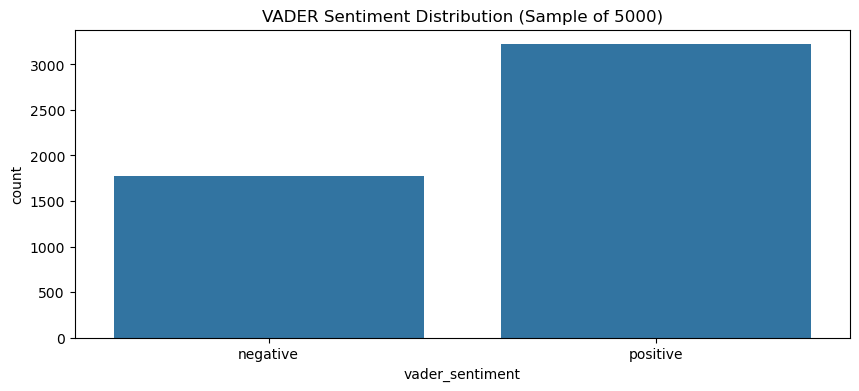

In [50]:
plt.figure(figsize=(10, 4))
sns.countplot(x='vader_sentiment', data=df)
plt.title('VADER Sentiment Distribution (Sample of 5000)')
plt.show()

In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [52]:
df['original_sentiment'] = df['sentiment'].apply(lambda x: x.lower())
df['vader_sentiment'] = df['vader_sentiment'].apply(lambda x: x.lower())

In [53]:
accuracy = accuracy_score(df['original_sentiment'], df['vader_sentiment'])
conf_matrix = confusion_matrix(df['original_sentiment'], df['vader_sentiment'])
report = classification_report(df['original_sentiment'], df['vader_sentiment'])

In [54]:
print(f"VADER Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

VADER Accuracy: 0.7034
Confusion Matrix:
 [[1414 1118]
 [ 365 2103]]
Classification Report:
               precision    recall  f1-score   support

    negative       0.79      0.56      0.66      2532
    positive       0.65      0.85      0.74      2468

    accuracy                           0.70      5000
   macro avg       0.72      0.71      0.70      5000
weighted avg       0.72      0.70      0.70      5000



In [55]:
full_df = pd.read_csv("IMDB Dataset.csv")

In [56]:
full_df['clean_review'] = full_df['review'].apply(lambda x: re.sub('<.*?>', '', x))
full_df['clean_review'] = full_df['clean_review'].apply(lambda x: re.sub('[^a-zA-Z ]', '', x))

In [57]:
from tqdm import tqdm
tqdm.pandas()

In [58]:
sid = SentimentIntensityAnalyzer()

In [59]:
full_df['vader_score'] = full_df['clean_review'].progress_apply(lambda x: sid.polarity_scores(x)['compound'])
full_df['vader_sentiment'] = full_df['vader_score'].apply(lambda x: 'positive' if x >= 0 else 'negative')

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50000/50000 [01:20<00:00, 619.62it/s]


In [60]:
full_df.to_csv("full_vader_results.csv", index=False)

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

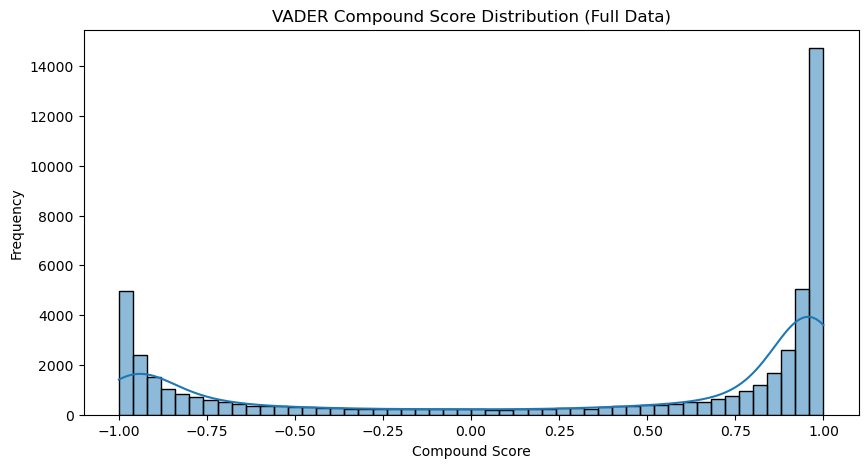

In [62]:
plt.figure(figsize=(10, 5))
sns.histplot(full_df['vader_score'], bins=50, kde=True)
plt.title('VADER Compound Score Distribution (Full Data)')
plt.xlabel('Compound Score')
plt.ylabel('Frequency')
plt.show()

In [63]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [64]:
positive_text = ' '.join(full_df[full_df['vader_sentiment'] == 'positive']['clean_review'])
negative_text = ' '.join(full_df[full_df['vader_sentiment'] == 'negative']['clean_review'])


In [65]:
plt.figure(figsize=(14, 6))

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

Text(0.5, 1.0, 'Word Cloud - Positive Reviews')

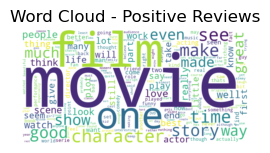

In [66]:
plt.subplot(1, 2, 1)
plt.imshow(WordCloud(width=800, height=400, background_color='white').generate(positive_text), interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Positive Reviews')

Text(0.5, 1.0, 'Word Cloud - Negative Reviews')

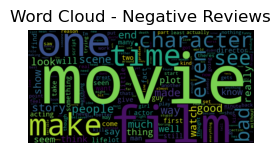

In [67]:
plt.subplot(1, 2, 2)
plt.imshow(WordCloud(width=800, height=400, background_color='black').generate(negative_text), interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Negative Reviews')

In [68]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

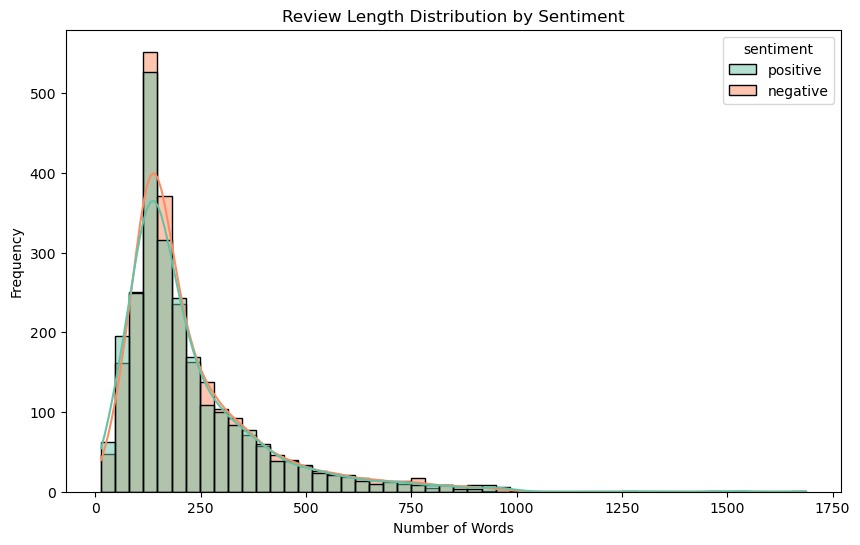

In [30]:
# Add review length column
df['review_length'] = df['clean_review'].apply(lambda x: len(x.split()))

# Plot histogram of review lengths by sentiment
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='review_length', hue='sentiment', bins=50, kde=True, palette='Set2')
plt.title('Review Length Distribution by Sentiment')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


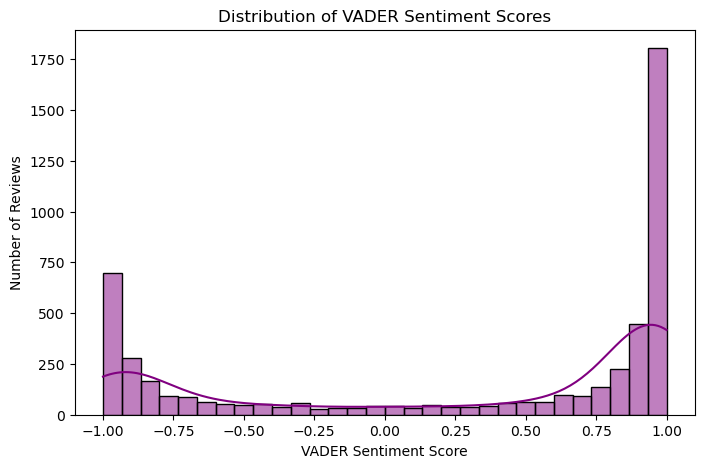

In [36]:
plt.figure(figsize=(8,5))
sns.histplot(df['vader_score'], bins=30, kde=True, color='purple')
plt.title('Distribution of VADER Sentiment Scores')
plt.xlabel('VADER Sentiment Score')
plt.ylabel('Number of Reviews')
plt.show()


C:\Users\suraj\AppData\Local\Temp\ipykernel_2208\1921341441.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='vader_sentiment', data=df, palette='pastel')


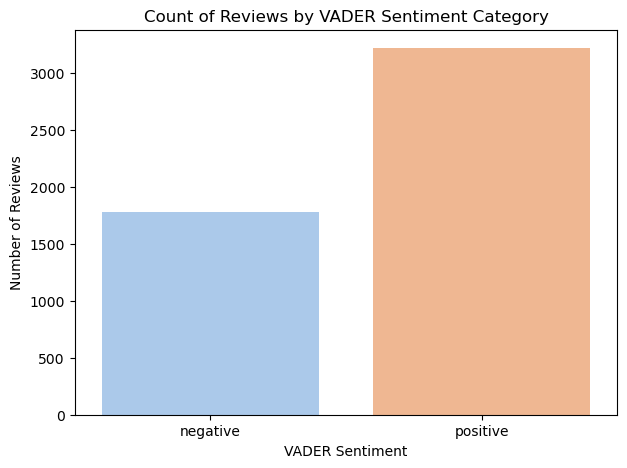

In [37]:
plt.figure(figsize=(7,5))
sns.countplot(x='vader_sentiment', data=df, palette='pastel')
plt.title('Count of Reviews by VADER Sentiment Category')
plt.xlabel('VADER Sentiment')
plt.ylabel('Number of Reviews')
plt.show()


C:\Users\suraj\AppData\Local\Temp\ipykernel_2208\105367550.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='vader_sentiment', y='review_length', data=df, palette='muted')


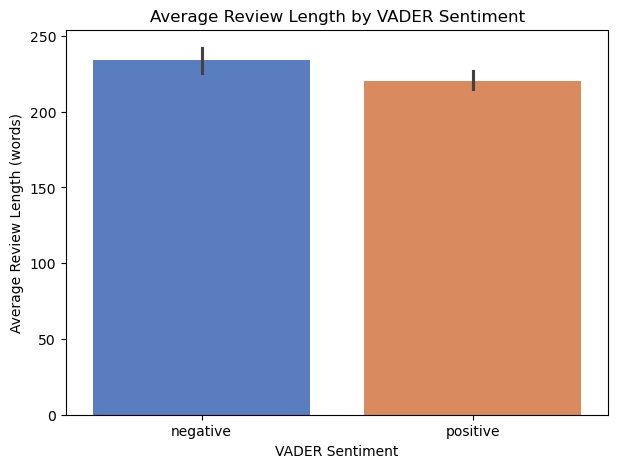

In [38]:
plt.figure(figsize=(7,5))
sns.barplot(x='vader_sentiment', y='review_length', data=df, palette='muted')
plt.title('Average Review Length by VADER Sentiment')
plt.xlabel('VADER Sentiment')
plt.ylabel('Average Review Length (words)')
plt.show()


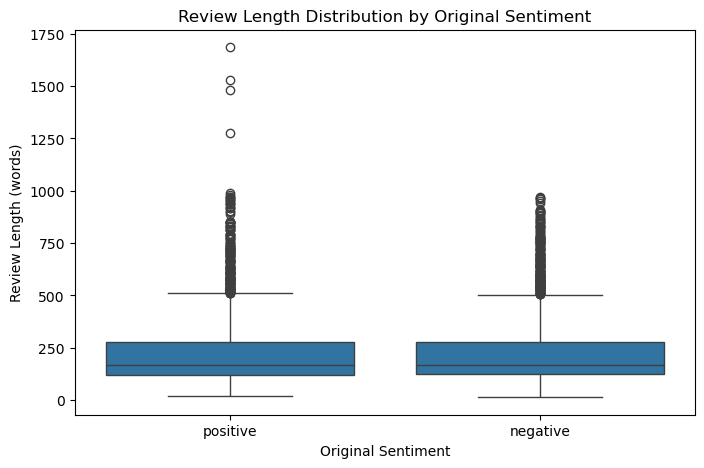

In [39]:
plt.figure(figsize=(8,5))
sns.boxplot(x='original_sentiment', y='review_length', data=df)
plt.title('Review Length Distribution by Original Sentiment')
plt.xlabel('Original Sentiment')
plt.ylabel('Review Length (words)')
plt.show()


In [29]:
full_df.to_csv("IMDB_Reviews_with_VADER.csv", index=False)
print("Saved to IMDB_Reviews_with_VADER.csv")

Saved to IMDB_Reviews_with_VADER.csv
